In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Install Required Libraries**

In [32]:
try:
    import gensim
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
try:
    import spacy
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])


In [ ]:
try:
    import torch
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])


In [ ]:
try:
    import sklearn
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])


# **2. Load and Preprocess the Dataset**

In [63]:
file = pd.read_csv("/content/drive/MyDrive/GENAI/Week5/Day4/stock_market_dataset.csv")
df_total = pd.DataFrame(file)
df_total.drop_duplicates(inplace=True)
df_total.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [64]:
df_total.shape

(1334, 9)

In [65]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


In [66]:
df_total.describe()

,unix,open,high,low,close,Volume XRP,Volume USDT
count,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1.334000e+03
mean,1.582978e+12,0.473318,0.495597,0.450075,0.473632,3.567016e+08,2.356279e+08
std,3.328447e+10,0.319903,0.341216,0.297513,0.320127,5.914574e+08,4.840987e+08
min,1.525390e+12,0.135360,0.149380,0.101290,0.135490,2.384512e+06,2.198450e+06
25%,1.554182e+12,0.256295,0.263605,0.250050,0.256343,6.448872e+07,1.894323e+07
50%,1.582975e+12,0.326050,0.337595,0.315500,0.326050,1.480822e+08,4.136179e+07
75%,1.611770e+12,0.565155,0.599938,0.528917,0.566190,3.779833e+08,2.519194e+08
max,1.640560e+12,1.833960,1.966890,1.652430,1.834680,8.608358e+09,4.589984e+09


In [67]:
df_total["date"] = pd.to_datetime(df_total["date"])

In [68]:
df_total.isna().mean() * 100

,0
unix,0.0
date,0.0
symbol,0.0
open,0.0
high,0.0
low,0.0
close,0.0
Volume XRP,0.0
Volume USDT,0.0


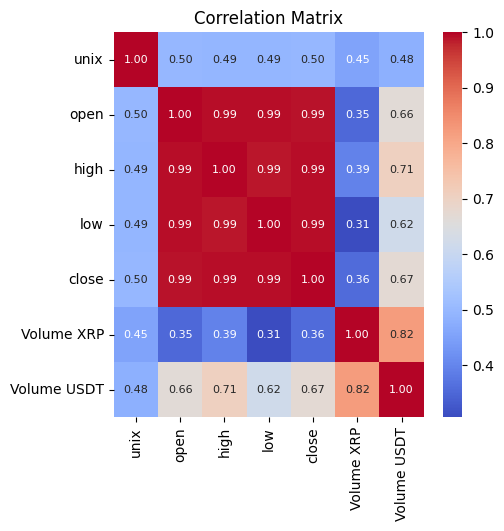

In [69]:
numericals = df_total.select_dtypes(include='number').columns

corr = df_total[numericals].corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Matrix")
plt.show()

In [70]:
df_final = df_total.drop(columns = ["date", "symbol", "unix", "Volume XRP", "Volume USDT"], axis=1)
df_final.head()

,open,high,low,close
0,0.9200,0.9237,0.9200,0.9226
1,0.9252,0.9334,0.9052,0.9200
2,0.9114,0.9350,0.8981,0.9252
3,0.9941,0.9966,0.8964,0.9115
4,0.9538,1.0167,0.9372,0.9941


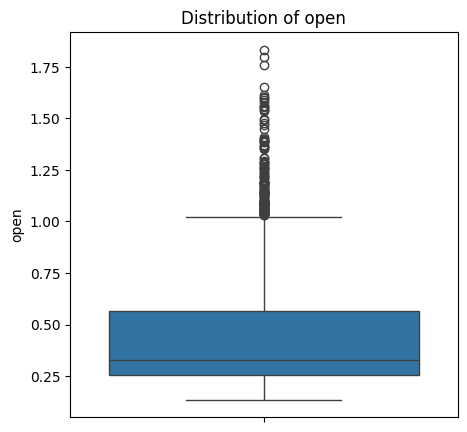

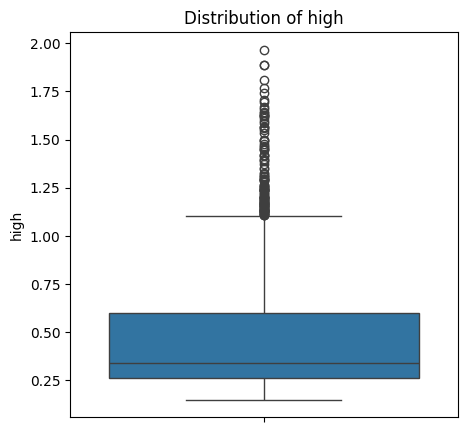

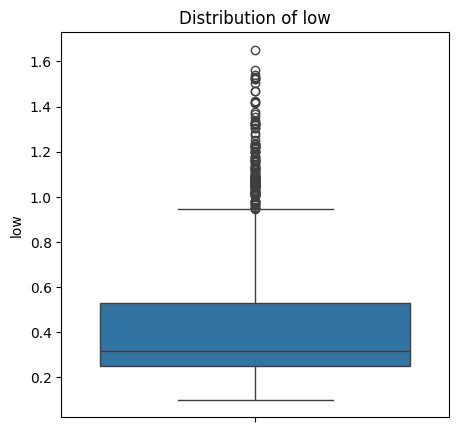

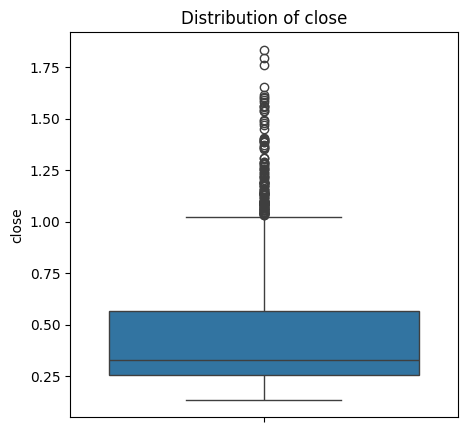

In [71]:
for col in df_final.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(df_final[col])
  plt.title(f"Distribution of {col}")
  plt.show()

In [72]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df_final))

df_clean = df_final[(z_scores < 3).all(axis=1)]

In [73]:
df_clean.shape

(1308, 4)

In [74]:
df_clean["Target"] = df_clean["close"].shift(-1)

/tmp/ipython-input-74-2548375818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Target"] = df_clean["close"].shift(-1)


In [75]:
df_clean.dropna(inplace=True)

/tmp/ipython-input-75-1832953665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


On transforme nos données sur l'échelle logarithmique pour réduire l'impacte des fortes valeurs réstantes

In [76]:
df_clean = np.log1p(df_clean)

On normalise les données

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.head()

,open,high,low,close,Target
0,0.701223,0.662783,0.742412,0.702984,0.701178
1,0.704833,0.669256,0.732076,0.701178,0.704788
2,0.695231,0.670321,0.727089,0.704788,0.695255
3,0.751766,0.710650,0.725893,0.695255,0.751728
4,0.724515,0.723540,0.754324,0.751728,0.724405


# **3. Prepare the Dataset for Training**

In [79]:
data = df_scaled[["open", "high", "low", "close", "Target"]].values
data

array([[0.70122323, 0.66278332, 0.74241168, 0.70298404, 0.70117757],
       [0.70483318, 0.66925597, 0.73207615, 0.70117757, 0.70478807],
       [0.69523142, 0.67032051, 0.72708937, 0.70478807, 0.69525467],
       ...,
       [0.66230225, 0.62556419, 0.6562108 , 0.633364  , 0.66225779],
       [0.68921259, 0.65896455, 0.68392539, 0.66225779, 0.68916508],
       [0.68006251, 0.67032051, 0.71996325, 0.68916508, 0.68008425]])

In [80]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

In [81]:
from torch.utils.data import Dataset

class TimeseriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = self.data[idx : idx + self.window_size]

        y = self.data[idx + self.window_size][4]

        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [82]:
from torch.utils.data import DataLoader

window_size = 30

train_dataset = TimeseriesDataset(train_data, window_size)
val_dataset = TimeseriesDataset(val_data, window_size)
test_dataset = TimeseriesDataset(test_data, window_size)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# **4. Define the LSTM Model**

In [83]:
from torch import nn

class StockGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(StockGRUModel, self).__init__()

        self.gru = nn.GRU(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout if num_layers > 1 else 0)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        last_hidden = gru_out[:, -1, :]
        out = self.dropout(last_hidden)
        out = self.fc(out)
        return out.squeeze(1)

In [84]:
model = StockGRUModel(input_size=5, hidden_size=64, num_layers=2, dropout=0.2)

# **5. Train the Model**

In [85]:
import torch
import torch.optim as optim

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [86]:
import time

num_epochs = 10
total_start = time.time()

for epoch in range(num_epochs):
    start = time.time()

    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        batch_loss = criterion(outputs, y_batch)
        batch_loss.backward()
        optimizer.step()
        train_loss += batch_loss.item() * X_batch.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            batch_loss = criterion(outputs, y_batch)
            val_loss += batch_loss.item() * X_batch.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)

    end = time.time()
    duration = end - start

total_duration = time.time() - total_start
print(f"\n✅ Training completed in {total_duration/60:.2f} minutes.")



✅ Training completed in 0.11 minutes.


# **6. Evaluate the Model**

In [106]:
from sklearn.metrics import r2_score

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_true.extend(y_batch.numpy())
        y_pred.extend(outputs.numpy())

r2 = r2_score(y_true, y_pred)
print(f"✅ R² Score on Test Set: {r2:.4f}")

✅ R² Score on Test Set: 0.8919


In [88]:
import joblib

joblib.dump(scaler, 'scaler.save')

['scaler.save']

# **7. Visualisation**

In [107]:
y_pred = np.array(y_pred).reshape(-1, 1)
y_true = np.array(y_true).reshape(-1, 1)

In [108]:
temp_pred = np.zeros((len(y_pred), 5))
temp_true = np.zeros((len(y_true), 5))

target_index = 4
temp_pred[:, target_index] = y_pred.flatten()
temp_true[:, target_index] = y_true.flatten()

inv_pred = scaler.inverse_transform(temp_pred)
inv_true = scaler.inverse_transform(temp_true)

y_pred_final = np.expm1(inv_pred[:, target_index])
y_true_final = np.expm1(inv_true[:, target_index])

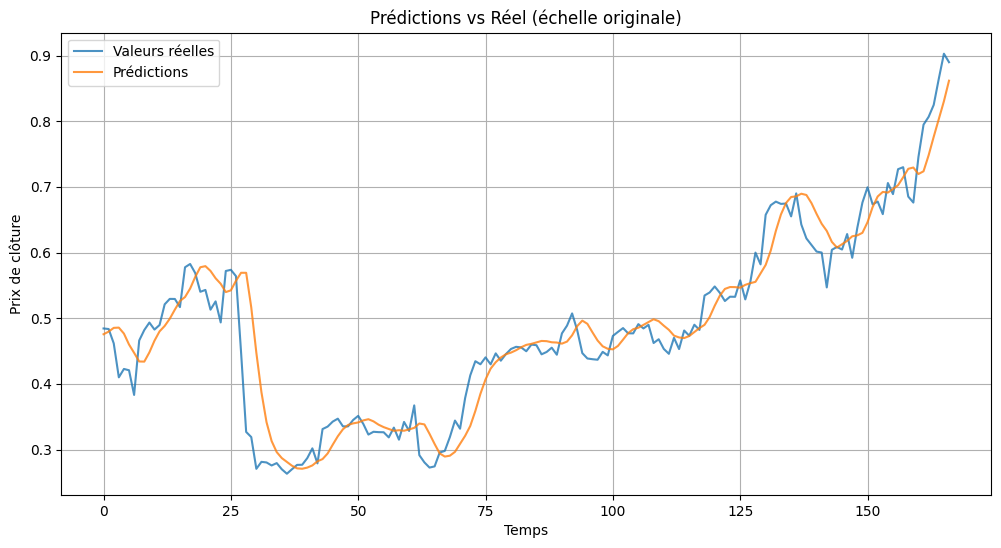

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(y_true_final, label="Valeurs réelles", alpha=0.8)
plt.plot(y_pred_final, label="Prédictions", alpha=0.8)
plt.title("Prédictions vs Réel (échelle originale)")
plt.xlabel("Temps")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid(True)
plt.show()